# <font color='Green'>BUT: Prédire le nombre de vélos loués par heure dans la ville (variable `count`).</font>

# [ **I ) Analyse exploratoire**](#content1)

1. [Valeurs manquantes](#content1_1)
2. [Types de données: catégoriques et numériques](#content1_2)
3. [Étude des données catégoriques](#content1_3)
4. [Étude des données numériques](#content1_4)
5. [Corrélations](#content1_5)
6. [Dépendances temporelles](#content1_6)
7. [Tendances abonnés / non-abonnés](#content1_7)

# [ **II ) Modélisation**](#content2) 
1. [Feature engineering](#content2_1)
2. [Modèle de base (*baseline*)](#content2_2)
3. [Modèles de Machine Learning](#content2_3)
4. [Meilleur modèle](#content2_4)
5. [Importances des variables](#content2_5)

# [ **III ) Pour aller plus loin**](#content3)

<a id="content1"></a>
# <font color='blue'>I) Analyse exploratoire</font>

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [63]:
np.random.seed(28)  # for reproducibility

In [64]:
df = pd.read_csv('data.csv', index_col='datetime', parse_dates=True)

In [65]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.70,50,26.00,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.43,57,15.00,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.91,61,15.00,4,164,168


In [66]:
df.shape

(10886, 11)

<a id="content1_1"></a>
### 1.1 ) Valeurs manquantes
#### Nous débutons par vérifier la présence de potentielles valeurs manquantes ou non numériques (NaN)

In [67]:
# display optionfor pandas Dataframes
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [68]:
df_null = (df.isnull().sum()) / len(df) * 100
#df_na = df.drop(df[df==0].index).sort_values(by='count', ascending=False)
df_null

season       0.00
holiday      0.00
workingday   0.00
weather      0.00
temp         0.00
atemp        0.00
humidity     0.00
windspeed    0.00
casual       0.00
registered   0.00
count        0.00
dtype: float64

Il n'y a pas de valeurs manquantes dans chacunes des colonnes.

In [69]:
df_na = (df.isna().sum()) / len(df) * 100
df_na

season       0.00
holiday      0.00
workingday   0.00
weather      0.00
temp         0.00
atemp        0.00
humidity     0.00
windspeed    0.00
casual       0.00
registered   0.00
count        0.00
dtype: float64

Il n'y a pas non plus de valeurs `NaN`.

<a id="content1_2"></a>
### 1.2) Types de données: catégoriques et numériques

On crée des colonnes temporelles dont nous aurons besoin tels que l'heure, le jour de la semaine, le mois etc. Ces dernières permettront d'étudier le nombre total de locations horaires.

In [70]:
# Create hours, days, weeks, months, year 
def load_create_time_feat(path='data.csv'):
    """
    Load and create time related feature from the datetime index of the dataset.
    """
    
    df = pd.read_csv(path, index_col='datetime', parse_dates=True)
    df['week'] = df.index.week
    df['day_month'] = df.index.day
    df['year'] = df.index.year
    df['months'] = df.index.month
    df['day'] = df.index.dayofweek
    df['hour'] = df.index.hour
    df['weekend'] = (df['day'] > 4).astype(int)
    
    return df

# Init df
df = load_create_time_feat()

In [71]:
df.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
week            int64
day_month       int64
year            int64
months          int64
day             int64
hour            int64
weekend         int64
dtype: object

In [72]:
# Check for categorical values
print('-'*35)
print('First 5 uniques values from columns')
print('-'*35, '\n')
for col in df.columns:
    print(f'- {col} : {df[col].unique()[:5]}')

-----------------------------------
First 5 uniques values from columns
----------------------------------- 

- season : [1 2 3 4]
- holiday : [0 1]
- workingday : [0 1]
- weather : [1 2 3 4]
- temp : [ 9.84  9.02  8.2  13.12 15.58]
- atemp : [14.395 13.635 12.88  17.425 19.695]
- humidity : [81 80 75 86 76]
- windspeed : [ 0.      6.0032 16.9979 19.0012 19.9995]
- casual : [3 8 5 0 2]
- registered : [13 32 27 10  1]
- count : [16 40 32 13  1]
- week : [52  1  2  3  5]
- day_month : [1 2 3 4 5]
- year : [2011 2012]
- months : [1 2 3 4 5]
- day : [5 6 0 1 2]
- hour : [0 1 2 3 4]
- weekend : [1 0]


In [73]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,week,day_month,year,months,day,hour,weekend
count,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
mean,2.51,0.03,0.68,1.42,20.23,23.66,61.89,12.80,36.02,155.55,191.57,25.92,9.99,2011.50,6.52,3.01,11.54,0.29
std,1.12,0.17,0.47,0.63,7.79,8.47,19.25,8.16,49.96,151.04,181.14,15.02,5.48,0.50,3.44,2.00,6.92,0.45
min,1.00,0.00,0.00,1.00,0.82,0.76,0.00,0.00,0.00,0.00,1.00,1.00,1.00,2011.00,1.00,0.00,0.00,0.00
25%,2.00,0.00,0.00,1.00,13.94,16.66,47.00,7.00,4.00,36.00,42.00,14.00,5.00,2011.00,4.00,1.00,6.00,0.00
50%,3.00,0.00,1.00,1.00,20.50,24.24,62.00,13.00,17.00,118.00,145.00,26.00,10.00,2012.00,7.00,3.00,12.00,0.00
75%,4.00,0.00,1.00,2.00,26.24,31.06,77.00,17.00,49.00,222.00,284.00,40.00,15.00,2012.00,10.00,5.00,18.00,1.00
max,4.00,1.00,1.00,4.00,41.00,45.45,100.00,57.00,367.00,886.00,977.00,52.00,19.00,2012.00,12.00,6.00,23.00,1.00


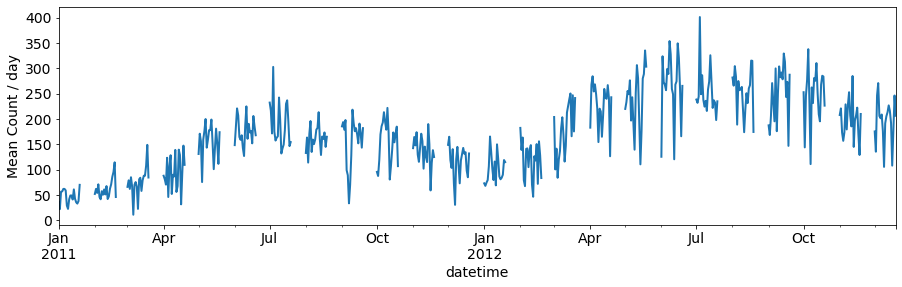

In [74]:
# 2011-2012 visualization
df_day = df.groupby(pd.Grouper(freq='d'))

with plt.rc_context(rc={'font.size':14}): 
    fig, ax = plt.subplots(figsize=(15,4))
    df_day['count'].median().plot(ax=ax, lw=2)
    ax.set(ylabel='Mean Count / day')

In [75]:
# Check the data consistency
df[:500:24].index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-02 00:00:00',
               '2011-01-03 01:00:00', '2011-01-04 04:00:00',
               '2011-01-05 05:00:00', '2011-01-06 06:00:00',
               '2011-01-07 07:00:00', '2011-01-08 07:00:00',
               '2011-01-09 07:00:00', '2011-01-10 07:00:00',
               '2011-01-11 09:00:00', '2011-01-12 11:00:00',
               '2011-01-13 11:00:00', '2011-01-14 12:00:00',
               '2011-01-15 12:00:00', '2011-01-16 12:00:00',
               '2011-01-17 12:00:00', '2011-01-19 00:00:00',
               '2011-02-01 01:00:00', '2011-02-02 02:00:00',
               '2011-02-03 02:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)

**Remarque: Il n'y a des données que jusqu'au 19 du mois.**

<a id="content1_3"></a>
### 1.3) Étude des données catégoriques

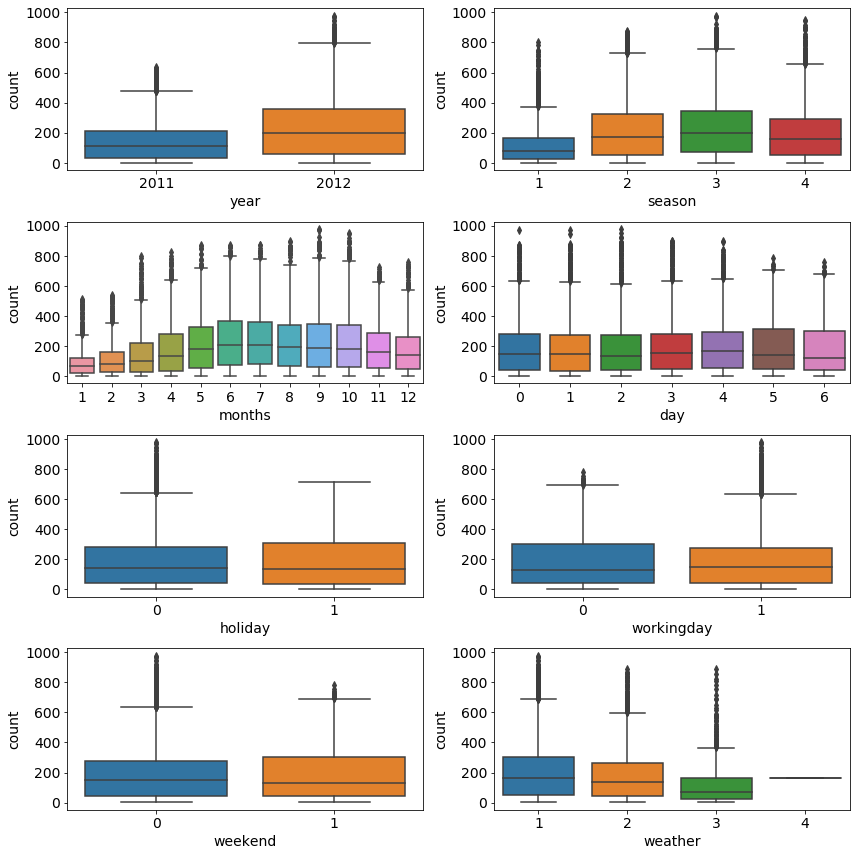

In [76]:
cols = 'year season months day holiday workingday weekend weather'.split()

with plt.rc_context(rc={'font.size':14}): 
    fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6), (ax7,ax8)) = plt.subplots(4,2, figsize=(12,12), tight_layout=True)       
    for col, ax in zip(cols, [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]):       
        sns.boxplot(x=df[col], y=df['count'], ax=ax)

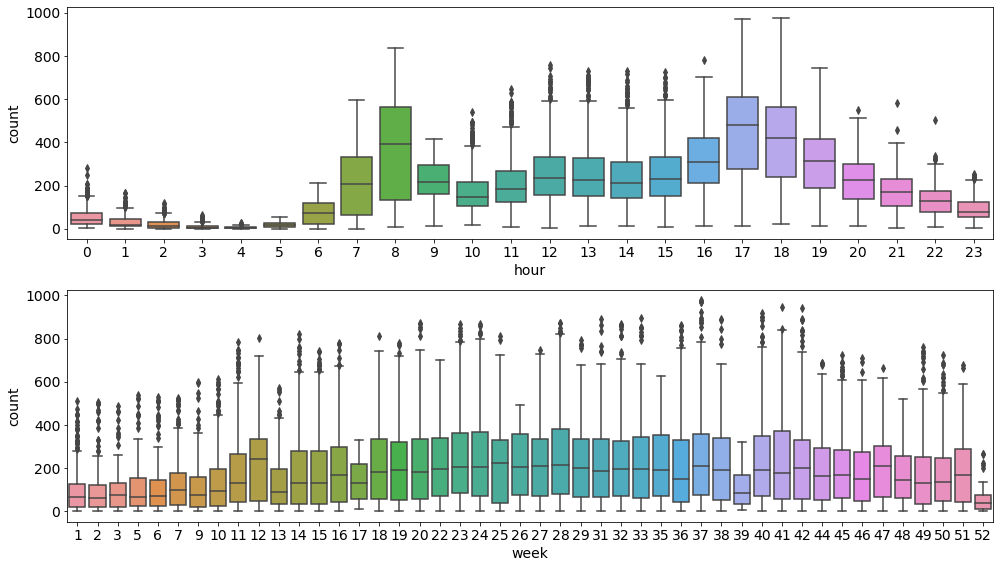

In [77]:
cols = 'hour week'.split()
with plt.rc_context(rc={'font.size':14}):
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=(14,8), tight_layout=True)       
    for col, ax in zip(cols, [ax1,ax2]):       
        sns.boxplot(x=df[col], y=df['count'], ax=ax)

À partir de ces distributions on peut déjà noter quelques résultats sur le nombre **total** de locations (qui seront à confirmer par la suite lors d'études statistiques plus fines):
- augmentation des locations entre 2011 et 2012
- locations plus importantes l'été et l'automne (faibles au printemps)
- locations importantes aux horaires de pointe (6-9h et 16-19h)
- locations plus importantes la semaine que le week-end (les vélos semblent être donc plus utilisés pour aller au travail que pour un loisir)

<a id="content1_4"></a>
### 1.4) Étude des données numériques

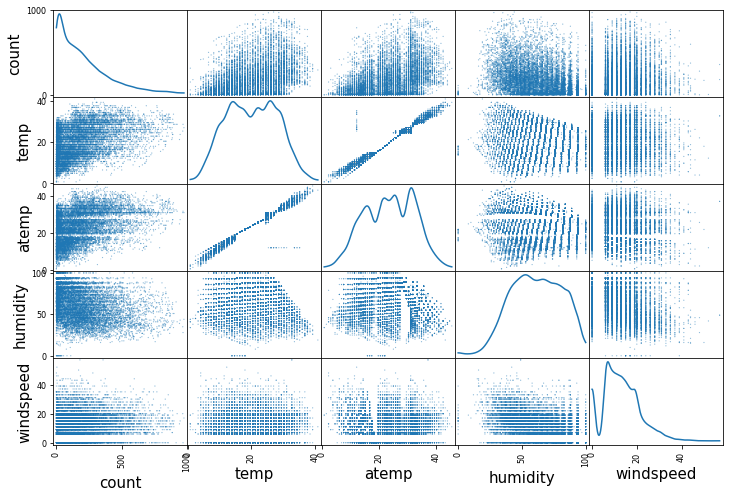

In [78]:
# Global scatter plot
cols = 'count temp atemp humidity windspeed'.split()
with plt.rc_context(rc={'font.size':15}):
    fig, ax = plt.subplots(figsize=(12,8))
    pd.plotting.scatter_matrix(df[cols], diagonal='kde', s=6, ax=ax)

### ***Count - Température - Humidité - Vent***

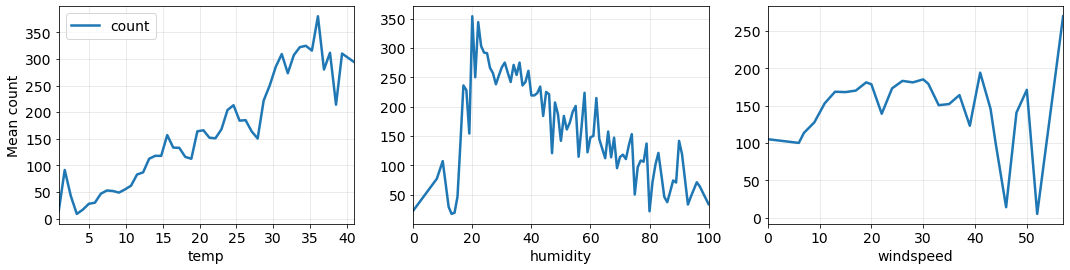

In [79]:
with plt.rc_context(rc={'font.size':14}): 
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,4))
    df.pivot_table(index='temp', values='count', aggfunc='median').plot(lw=2.5, ax=ax1)
    df.pivot_table(index='humidity', values='count', aggfunc='median').plot(lw=2.5, ax=ax2, legend=None)
    df.pivot_table(index='windspeed', values='count', aggfunc='median').plot(lw=2.5, ax=ax3, legend=None)
    for ax in [ax1,ax2,ax3]:
        ax.grid(alpha=0.3, which='both')
    ax1.set(ylabel='Mean count')

#### **Température - Ressentie**

In [80]:
print(f'Pearson coefficient: {stats.pearsonr(df.temp, df.atemp)[0]:.2f}')

Pearson coefficient: 0.98


<a id="content1_5"></a>
### 1.5) Corrélations
Avant de faire du *features engineering* ou autre, une façon d'avoir une idée des variables les plus corrélées avec la *target* (`count`) est de calculer la matrice de corrélation.

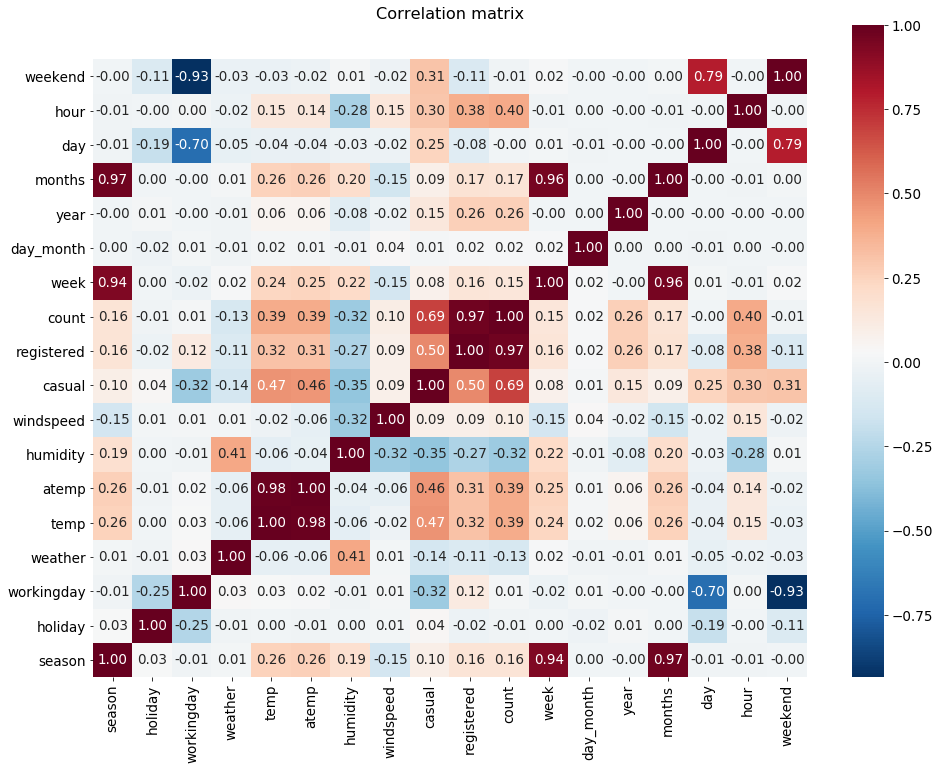

In [81]:
# Compute the correlations
corr = df.corr()   

# Most correlated variables
threshold = 0
top_corr_features = corr.index[np.abs(corr['count']) > threshold]
#print(top_corr_features)

# Plot correlation
with plt.rc_context(rc={'font.size':13.5}): 
    fig, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(df[top_corr_features].corr(), annot=True, 
                fmt='.2f', cmap='RdBu_r', ax=ax)
    ax.set(ylim=[0, 19], title='Correlation matrix')

In [82]:
print(corr['count'].sort_values(ascending=False))

count         1.00
registered    0.97
casual        0.69
hour          0.40
temp          0.39
atemp         0.39
year          0.26
months        0.17
season        0.16
week          0.15
windspeed     0.10
day_month     0.02
workingday    0.01
day          -0.00
holiday      -0.01
weekend      -0.01
weather      -0.13
humidity     -0.32
Name: count, dtype: float64


On peut déjà noter que :
- **week number** est très corrélé avec la variable **mois** et très peu avec le nombre total de locations on pourra donc l'enlever lors de la modélisation
- **weekend** est naturellement très (anti-)corrélé avec **workingday**, il suffira donc de considérer uniquement l'une de ces 2 variables
- Nous n'utiliserons donc pas la variable **atemp** lors des prédictions (information redondante avec **temp** qui peut biaiser les modèles car cela engendrerait de la multicolinéarité).

Globalement, cela permet d'avoir un indice sur les composantes qui impactent le plus le nombre de locations par heure à savoir:
- **hour**, **temp**, **humidity**, **year**, **season**, **weather**

Toutefois, du fait que registered + casual = count, afin de prédire `count` nous n'utiliserons pas les colonnes **registered** et **casual** (multicolinéarité)

<a id="content1_6"></a>
### 1.6) Dépendances temporelles

In [83]:
months = 'Jan. Feb. March April May June July Aug. Sept. Oct. Nov. Dec.'.split()
days = 'lundi mardi mercredi jeudi vendredi samedi dimanche'.split()

#### <font color='Black'>Évolution annuelle</font>

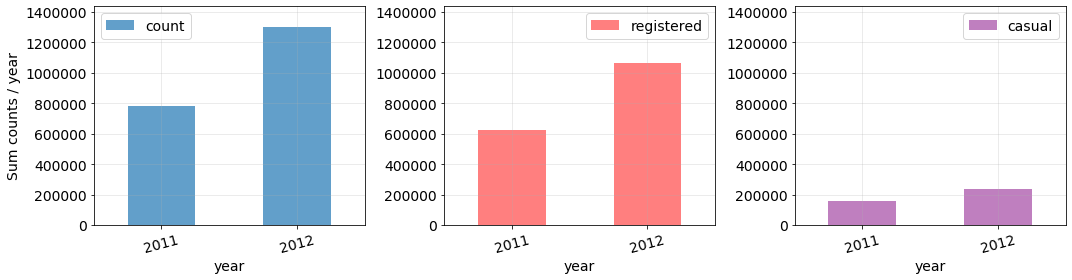

In [99]:
group = df.groupby('year')['count']
group_reg = df.groupby('year')['registered']
group_cas = df.groupby('year')['casual']
with plt.rc_context(rc={'font.size':14}): 
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4), tight_layout=True)
    group.sum().plot(kind='bar', alpha=0.7, ax=ax1, legend='total')
    group_reg.sum().plot(kind='bar', alpha=0.5, ax=ax2, color='red', legend='registered')
    group_cas.sum().plot(kind='bar', alpha=0.5, ax=ax3, color='purple', legend='casual')    
    ax1.set(ylabel='Sum counts / year')
    ymin, ymax = ax1.get_ylim()
    for ax in [ax1,ax2,ax3]:
        ax.tick_params(axis='x', rotation=15)
        ax.set(ylim=[0, ymax*1.05])
        ax.grid(alpha=0.3, which='both')

In [102]:
sum_year = group.sum().values
augm = sum_year[1] / sum_year[0] 
print(f'Augmentation du nombre total de locations de {(augm - 1)*100:.1f}% entre 2011 et 2012.')

sum_year = group_reg.sum().values
augm = sum_year[1] / sum_year[0] 
print(f'Augmentation du nombre total de locations (abonnés) de {(augm - 1)*100:.1f}% entre 2011 et 2012.')

sum_year = group_cas.sum().values
augm = sum_year[1] / sum_year[0] 
print(f'Augmentation du nombre total de locations (non abonnés) de {(augm - 1)*100:.1f}% entre 2011 et 2012.')

Augmentation du nombre total de locations de 66.7% entre 2011 et 2012 !
Augmentation du nombre total de locations (abonnés) de 70.4% entre 2011 et 2012 !
Augmentation du nombre total de locations (non abonnés) de 51.7% entre 2011 et 2012 !


On remarque que l'augmentation du nombre total de locations horaires est présente au sein des 2 populations (abonnés et non-abonnés). 

Globalement, il est à noter que le nombre total de locations augmente de plus de 66% en une année.

#### <font color='Black'>Évolution de Janvier 2011 à Décembre 2012</font>

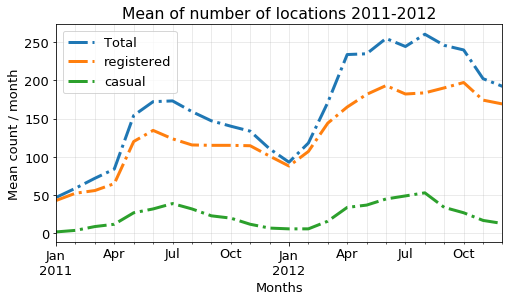

In [25]:
df_month = df.groupby(pd.Grouper(freq='M'))
with plt.rc_context(rc={'font.size':13}): 
    fig, ax = plt.subplots(figsize=(8,4))   
    df_month['count'].median().plot(ax=ax, ls='-.', lw=3, label='Total')
    df_month['registered'].median().plot(ax=ax, ls='-.', lw=3, label='registered')
    df_month['casual'].median().plot(ax=ax, ls='-.', lw=3, label='casual')
    ax.set(title='Mean of number of locations 2011-2012', 
           xlabel='Months', ylabel='Mean count / month')
    ax.legend(loc='best')
    ax.grid(alpha=0.3, which='both')

On peut ainsi remarquer une tendance et des saisonnalités:
- la tendance est croissante et notamment présente dans la population des abonnés
- le nombre de non abonnés augmente très légèrement entre 2011 et 2012
- il y a une saisonnalité: pic de location entre Avril et Octobre (présente à la fois chez les abonnés et non abonnés)

#### **Dépendance dans le mois et la semaine**

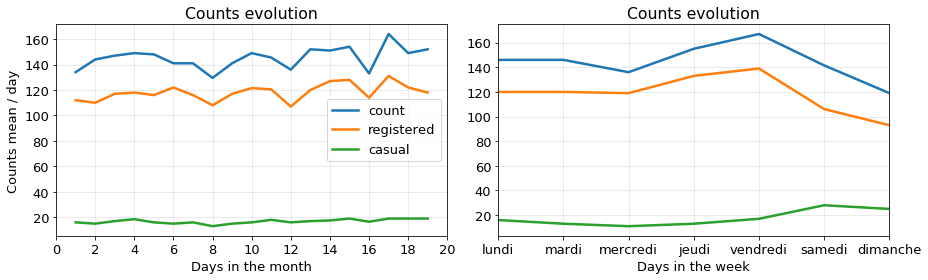

In [26]:
with plt.rc_context(rc={'font.size':13}): 
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13,4), tight_layout=True)
    df.pivot_table(values='count', index='day_month', aggfunc='median').plot(ax=ax1, lw=2.5)
    df.pivot_table(values='registered', index='day_month', aggfunc='median').plot(ax=ax1, lw=2.5)
    df.pivot_table(values='casual', index='day_month', aggfunc='median').plot(ax=ax1, lw=2.5)   
    ax1.set(xlabel='Days in the month', ylabel='Counts mean / day', title='Counts evolution', 
           xticks=np.arange(0,21,2))
    
    df.pivot_table(values='count', index='day', aggfunc='median').plot(ax=ax2, lw=2.5, legend=None)
    df.pivot_table(values='registered', index='day', aggfunc='median').plot(ax=ax2, lw=2.5, legend=None)
    df.pivot_table(values='casual', index='day', aggfunc='median').plot(ax=ax2, lw=2.5, legend=None)
    ax2.set(xlabel='Days in the week', title='Counts evolution', 
           xticklabels=days, xticks=np.arange(0,7))
    
    for ax in [ax1,ax2]:
        ax.grid(alpha=0.3, which='both')
    ax1.legend(loc='best')

- On ne note pas de tendance spécifique au sein d'un même mois
- On remarque encore une fois que le nombre de locations est plus important en semaine

#### <font color='Red'>Évolutions journalières (et hebdomadaire)</font> 

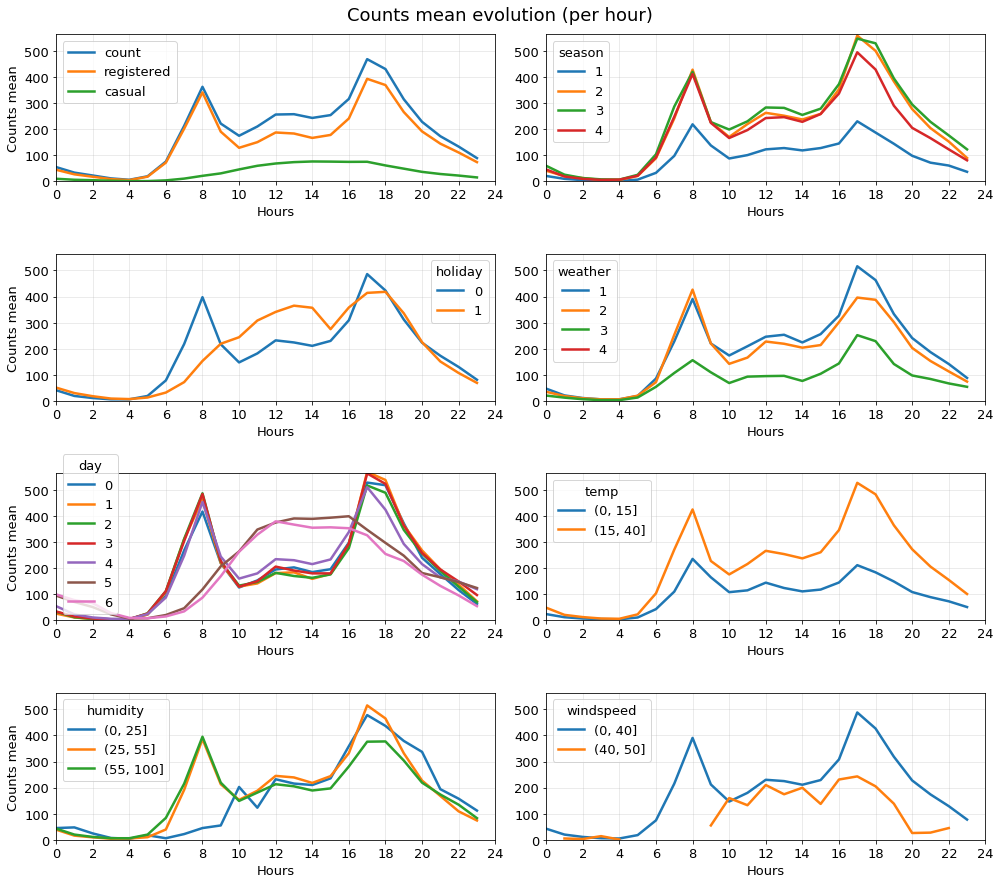

In [27]:
# On groupe par température, humidité et vitesse du vent
temp_cut = pd.cut(df['temp'], [0, 15, 40])
humid_cut = pd.cut(df['humidity'], [0, 25, 55, 100])  # 25-55% idéal
wind_cut = pd.cut(df['windspeed'], [0, 40, 50])

with plt.rc_context(rc={'font.size':13}): 
    fig, ((ax0,ax1), (ax2,ax3), (ax4,ax5), (ax6,ax7)) = plt.subplots(4,2, figsize=(14,12), 
                                                                     tight_layout=True)
    # Location partielles/totales par heure
    df.pivot_table(values='count', index='hour', aggfunc='mean').plot(ax=ax0, lw=2.5)
    df.pivot_table(values='registered', index='hour', aggfunc='mean').plot(ax=ax0, lw=2.5)
    df.pivot_table(values='casual', index='hour', aggfunc='mean').plot(ax=ax0, lw=2.5)    
    
    # Autres catégories
    df.pivot_table(values='count', index='hour', columns='season', aggfunc='median').plot(ax=ax1, lw=2.5)
    df.pivot_table(values='count', index='hour', columns='holiday', aggfunc='median').plot(ax=ax2, lw=2.5)
    df.pivot_table(values='count', index='hour', columns='weather', aggfunc='median').plot(ax=ax3, lw=2.5)
    df.pivot_table(values='count', index='hour', columns='day', aggfunc='median').plot(ax=ax4, lw=2.5)
    df.pivot_table(values='count', index='hour', columns=temp_cut, aggfunc='median').plot(ax=ax5, lw=2.5)
    df.pivot_table(values='count', index='hour', columns=humid_cut, aggfunc='median').plot(ax=ax6, lw=2.5)
    df.pivot_table(values='count', index='hour', columns=wind_cut, aggfunc='median').plot(ax=ax7, lw=2.5)

    for ax in [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7]:
        ax.set(xticks=np.arange(0,26,2), ylim=[0, plt.ylim()[1]*1.1], 
               xlabel='Hours', ylabel='Counts mean')
        ax.grid(alpha=0.3, which='both')    
    for ax in [ax1,ax3,ax5,ax7]:
        ax.set(ylabel='')
    fig.suptitle('Counts mean evolution (per hour)', fontsize=18, y=1.02)

***On peut déjà tirer de nombreux résultats***:
- 2 pics de locations de vélos de 6h à 9h et de 16h à 19h: axés sur les horaires de travail du lundi au vendredi
- week-end: locations importantes entre 10h et 19h: comportement plus étalé sur la journée
- vacances: comportements horaires similaires au week-end. 
- locations minimales au Printemps (météo)
- en cas de pluie: peu de locations voir pas du tout lors de neiges/fortes pluies
- température: dès qu'il fait suffisament bon (>15 °C) les locations sont plus importantes
- humidité: s'il fait très sec (taux < 25%), les locations sont très faibles le matin (très probablement pour ne pas arriver transpirant au travail). En revanche, le soir même s'il fait sec cela ne pose pas de soucis, les locations suivent les tendances des locations en cas de taux d'humidité favorables (et importants)
- vent: si la vitesse du vent est trop importante (> 40 km/h), il n'y a pas de location le matin (surement pour ne pas arriver également transpirant au travail). Le soir, les locations sont modérées (en cas de vents forts). 

<a id="content1_7"></a>
### 1.7) Tendances abonnés vs. non abonnés

In [28]:
palette = sns.color_palette('bright', 4)
def plot_count_categ(hue, titles='Total_count Registered Casual'.split(), 
                     col='months', estimator=np.median, fontsize=12,
                     palette=palette):
    with plt.rc_context(rc={'font.size':fontsize}): 
        fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))
        N = len(df[hue].unique())
        sns.lineplot(x=col, y='count', data=df, estimator=estimator, hue=hue, palette=palette[:N], ax=ax1)
        ymin, ymax = ax1.get_ylim()
        sns.lineplot(x=col, y='registered', data=df, estimator=estimator, hue=hue, palette=palette[:N], ax=ax2, legend=None)
        ax2.set(ylim=[0, ymax])
        sns.lineplot(x=col, y='casual', data=df, estimator=estimator, hue=hue, palette=palette[:N], ax=ax3, legend=None)
        ax3.set(ylim=[0, ymax])
        for t, ax in zip(titles, [ax1,ax2,ax3]):
            ax.set(title=t)
        for ax in [ax2,ax3]:
            ax.set(ylabel='')
        ax1.legend(loc='best')

#### **Working-day**

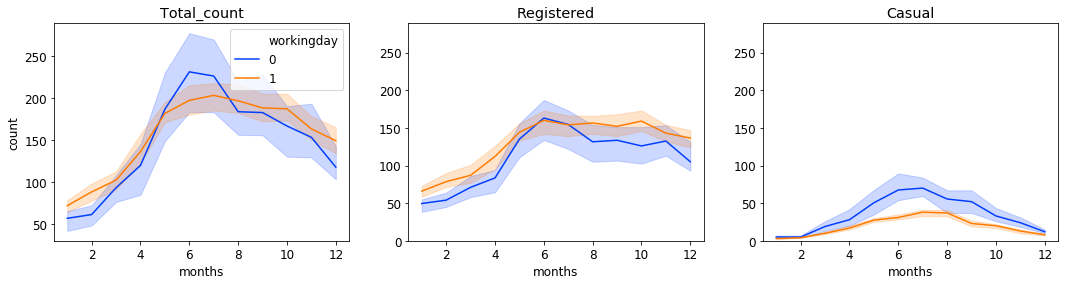

In [29]:
plot_count_categ('workingday')

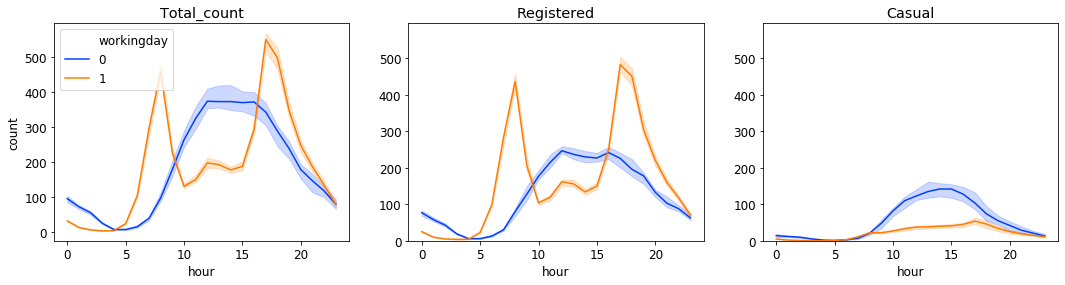

In [30]:
plot_count_categ('workingday', col='hour')

#### **Holiday**

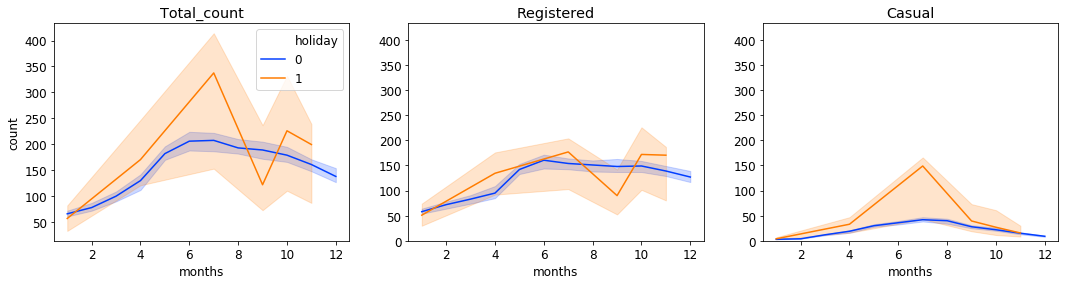

In [31]:
plot_count_categ('holiday')

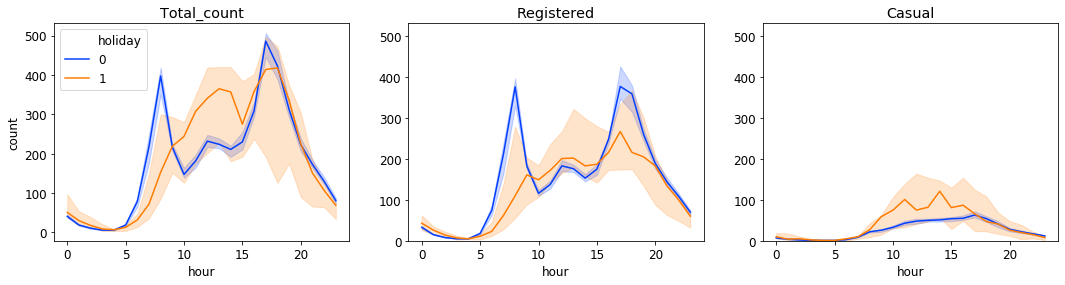

In [32]:
plot_count_categ('holiday', col='hour')

#### **Weather**

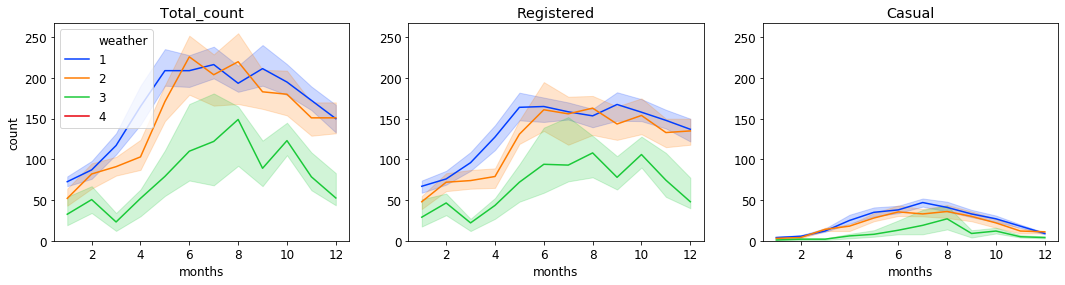

In [33]:
plot_count_categ('weather')

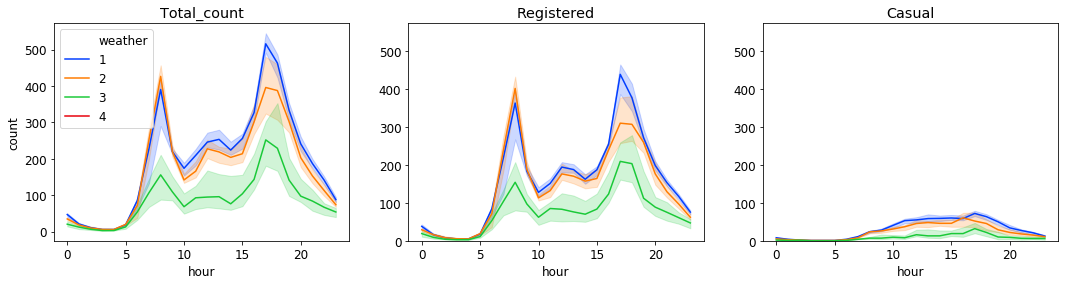

In [34]:
plot_count_categ('weather', col='hour')

- On peut remarquer que les locations ***casual*** ont majoritairement lieu le week-end (~ entre 10 et 20h).
- De plus, les locations ***casual*** sont maximales en cas de vacances entre Avril et Octobre.

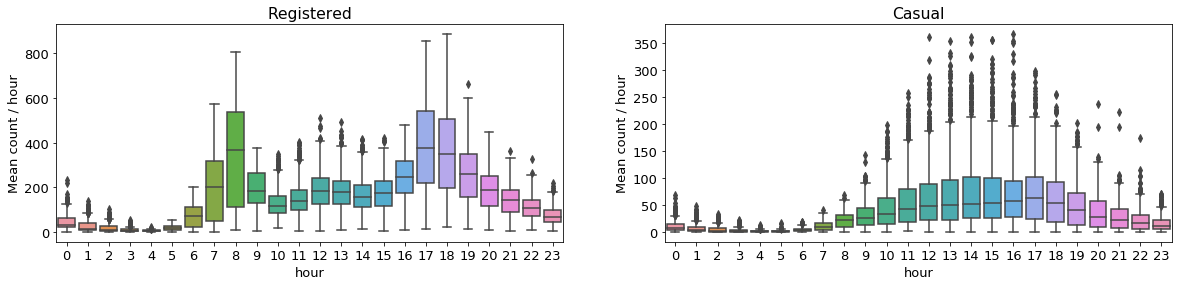

In [35]:
with plt.rc_context(rc={'font.size':13}): 
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,4))
    sns.boxplot(x='hour', y='registered', data=df, ax=ax1)
    sns.boxplot(x='hour', y='casual', data=df, ax=ax2)
    for t, ax in zip('Registered Casual'.split(), [ax1,ax2]):
        ax.set(title=t)
        ax.set(ylabel='Mean count / hour')

In [36]:
df['casual'].describe()

count   10886.00
mean       36.02
std        49.96
min         0.00
25%         4.00
50%        17.00
75%        49.00
max       367.00
Name: casual, dtype: float64

On peut remarquer les ***outliers*** au sein de la distribution des usagers non abonnés qui se réfletent au sein de la distribution totale $\rightarrow$ nous allons ainsi effectuer une **log-transformation** pour 'normaliser' la distribution `count`.

### **Total des locations**

In [37]:
df['count'].describe()

count   10886.00
mean      191.57
std       181.14
min         1.00
25%        42.00
50%       145.00
75%       284.00
max       977.00
Name: count, dtype: float64

The count skewness of count is 1.24


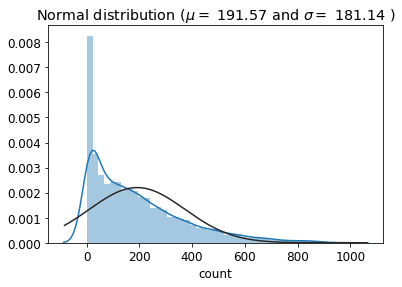

In [38]:
# Check distribution
def skew_distribution(data, col='count'):
    with plt.rc_context(rc={'font.size':12}): 
        fig, ax1 = plt.subplots()
        sns.distplot(data[col], ax=ax1, fit=stats.norm)
        (mu, sigma) = stats.norm.fit(data[col])
        ax1.set(title='Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma))
    #fig, ax2 = plt.subplots()
    #stats.probplot(data[col], plot=plt)
    print('The {} skewness of count is {:.2f}'.format(col, stats.skew(data[col])))

skew_distribution(df)

Pour appliquer des modèles de Machine Learning (ML), il est préférable d'avoir des données distribuées normalement: un moyen est de tranformer les données grâce au *log* afin d'avoir une *skewness* (asymétrie) proche de zéro (cela permet également de tenir compte des outliers).

The count_log skewness of count is 0.06


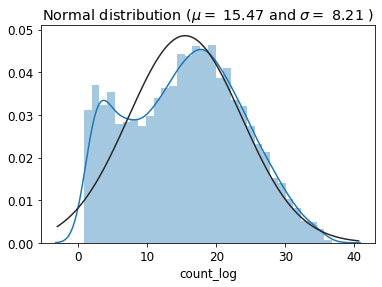

In [39]:
from scipy.special import boxcox1p, inv_boxcox1p

df['count_log'] = boxcox1p(df['count'], 0.4)
skew_distribution(df, col='count_log')

<a id="content2"></a>
# <font color='blue'>II) Modélisation</font>

<a id="content2_1"></a>
### 2.1) Feature engineering

Nous allons ici construire des variables (*features*) qui permettent de prendre en compte les différentes dépendances de la variable `count` avec les autres données que nous avons pu observer lors de la partie précédente.

In [40]:
df.drop(columns=['atemp','registered', 'casual', 'weekend'], 
        axis=1, inplace=True)

In [41]:
# April - October
df['seasonality'] = np.where((df['months'] >= 4) & (df['months'] <= 10), 1 ,0)

# rush, ideal variables
df['ideal'] = np.where((df['temp'] > 15) & (df['windspeed'] < 40) & (df['humidity'] < 70) & (df['humidity'] > 20) , 1, 0)
df['rush'] = np.where(((df['workingday'] == 1) & ((df['hour'] >= 6) & (df['hour'] <= 9)) | ((df['hour'] >= 16) & (df['hour'] <= 19)) )    # week
                      | (((df['workingday'] == 0) | (df['holiday'] == 1)) & (df['hour'] > 10) & (df['hour'] < 19)), 1, 0)    # week-end 
#df['humid_day'] = np.where((df['workingday'] == 1) & (df['humidity'] >= 50), 1, 0)

# Location during the day
df['daytime'] = np.where((df['hour'] >= 6) & (df['hour'] < 21), 1 ,0)

In [42]:
cols = 'season holiday workingday weather week day_month year months day hour seasonality ideal rush daytime'.split()
for col in cols:
    df[col] = df[col].astype(str)

In [43]:
num_cols = df.select_dtypes(exclude='object').columns
print('{} Numeric columns \n-----------------\n{}'.format(len(num_cols), num_cols.values))

categ_cols = df.select_dtypes(include='object').columns
print('\n{} Categorical columns \n----------------------\n{}'.format(len(categ_cols), categ_cols.values))

5 Numeric columns 
-----------------
['temp' 'humidity' 'windspeed' 'count' 'count_log']

14 Categorical columns 
----------------------
['season' 'holiday' 'workingday' 'weather' 'week' 'day_month' 'year'
 'months' 'day' 'hour' 'seasonality' 'ideal' 'rush' 'daytime']


In [44]:
print(df.shape, 'before dummy categories')
df = pd.get_dummies(df)
print(df.shape, 'after dummy categories')

(10886, 19) before dummy categories
(10886, 135) after dummy categories


In [45]:
#df.columns.to_series().groupby(df.dtypes).groups

In [46]:
# import librairies 
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

#### **Choix de la métrique**

Pour ce problème de régression, nous choisissons d'utiliser le RMSE comme critère de performance. Dans une moindre mesure nous calculerons également le $R^2$ (coefficient de détermination) afin de contrôler les prédictions.

In [47]:
###########
## Metrics 
###########

def compute_rmse(ytrue, ypred):
    """
    Compute the RMSE between data and predictions with 
    the `mean_squared_error` method from sklearn.
    """
    return np.sqrt(mean_squared_error(ytrue, ypred))

#### **Diviser les données en train/test**

On ne peut pas utiliser un `train_test_split` de façon classique pour séparer les données car ici il s'agit de données temporelles. Cela pourrait conduire à des biais si des données `test` étaient comprises entre des données `train` de façon aléatoire.

Ici, on va découper nos données de Janvier 2011 à Juillet 2011 (**TRAINING**) et de Août à Décembre 2012 (**TEST**).

In [48]:
def split_data(df, cols, target='count_log', n_splits=5):
    """
    Split the dataset into train/test with the `TimeSeriesSplit` method.
    """
    tsv = TimeSeriesSplit(n_splits=5)
    for train_index, test_index in tsv.split(df):
        df_train, df_test = df.iloc[train_index, :], df.iloc[test_index, :]
        print("TRAIN:", df_train.shape, "TEST:", df_test.shape)
    
    # Get train/test datasets     
    X_train, y_train = df_train[columns], df_train[target]
    X_test, y_test = df_test[columns], df_test[target]
    
    return X_train, X_test, y_train, y_test

In [49]:
columns = df.columns.drop(['count', 'count_log'])

X_train, X_test, y_train, y_test = split_data(df, columns, n_splits=5)

TRAIN: (1816, 135) TEST: (1814, 135)
TRAIN: (3630, 135) TEST: (1814, 135)
TRAIN: (5444, 135) TEST: (1814, 135)
TRAIN: (7258, 135) TEST: (1814, 135)
TRAIN: (9072, 135) TEST: (1814, 135)


<a id="content2_2"></a>
### 2.2) Modèle de référence (*baseline*)
Ici, afin d'avoir une valeur de référence du RMSE, nous construisons des prédictions à l'aide d'un *regressor* très basique qui consiste à considérer la valeur médiane des locations horaires.

In [50]:
reg_mean = DummyRegressor(strategy='mean')
reg_mean = reg_mean.fit(X_train, y_train)
dummy_pred = reg_mean.predict(X_test)
print(f'RMSE train: {compute_rmse(reg_mean.predict(X_train), y_train):.2f}')
print(f'RMSE test: {compute_rmse(dummy_pred, y_test):.2f}')
#print(f'RMSLE train: {compute_rmsle(reg_mean.predict(X_train), y_train):.2f}')
#print(f'RMSLE test: {compute_rmsle(dummy_pred, y_test):.2f}')

RMSE train: 8.01
RMSE test: 9.25


<a id="content2_3"></a>
### 2.3) Modèles de Machine Learning

Nous allons maintenant tester différents modèles *classiques* propre à la régression et calculer le score RMSE pour chacun d'entre eux ainsi que le coefficient $R^2$.

In [51]:
# Fit with default hyperparameters for now
models = [Ridge(), Lasso(), ElasticNet(), SVR(), RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor()]
names = ['Ridge', 'Lasso', 'ENet', 'SVR', 'RandomForestR', 'GradientBoostingR', 'XGBoostingR']
rmse = []
r2 = []
dico = {}
for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    rmse.append(compute_rmse(y_pred, y_test))
    r2.append(r2_score(y_pred, y_test))

[16:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [52]:
# add dummy regressor to results
names.append('DummyRegressor')
rmse.append(compute_rmse(dummy_pred, y_test))
r2.append(r2_score(dummy_pred, y_test))

res = pd.DataFrame({'Models': names, 'RMSE': rmse,  'R2': r2}) 

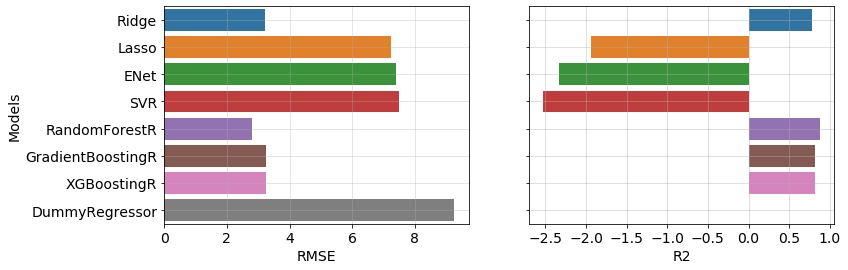

In [53]:
with plt.rc_context(rc={'font.size':14}): 
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
    sns.barplot(x='RMSE', y='Models', data=res, ax=ax1)
    sns.barplot(x='R2', y='Models', data=res, ax=ax2)
    ax2.set_yticklabels([])
    ax2.set_ylabel('')
    ax2.grid(alpha=0.5)
    ax1.grid(alpha=0.4)

On remarque que c'est le modèle `RandomForrestRegressor` qui performe le mieux (RMSE le plus faible et un $R^2$ le plus élevé).

<a id="content2_4"></a>
### 2.4) Meilleur modèle

Nous allons déterminer les meilleurs hyperparamètres du modèle `RandomForrestRegressor`.

In [54]:
# Custom GridSearchCV for time series data

tsv = TimeSeriesSplit(n_splits=5)
i = 1
score = []

for train_index, test_index in tsv.split(df):
    print('--'*20)
    print('Cross-val on {}-th/{} iteration'.format(i, tsv.n_splits))
    print('--'*20)
    df_train, df_test = df.iloc[train_index, :], df.iloc[test_index, :]    
    print("TRAIN:", df_train.shape, "TEST:", df_test.shape)
    X_tr, y_tr = df_train[columns], df_train['count_log']
    X_val, y_val = df_test[columns], df_test['count_log']    
    
    # loop over hyperparams
    for mf in np.linspace(50, 100, 2):
        for ne in np.linspace(100, 500, 3):
            for md in np.linspace(8, 30, 3):
                for msl in np.linspace(4, 30, 3):
                    clf = RandomForestRegressor(max_features=int(mf), 
                                                n_estimators=int(ne), 
                                                max_depth=int(md), 
                                                min_samples_leaf=int(msl),
                                                n_jobs=-1,
                                                random_state=28)
                    clf.fit(X_tr, y_tr)
                    y_pr = clf.predict(X_val)
                    score.append([i, mf, ne, md, msl, r2_score(y_pr, y_val), compute_rmse(y_pr, y_val)])
    i += 1

----------------------------------------
Cross-val on 1-th/5 iteration
----------------------------------------
TRAIN: (1816, 135) TEST: (1814, 135)
----------------------------------------
Cross-val on 2-th/5 iteration
----------------------------------------
TRAIN: (3630, 135) TEST: (1814, 135)
----------------------------------------
Cross-val on 3-th/5 iteration
----------------------------------------
TRAIN: (5444, 135) TEST: (1814, 135)
----------------------------------------
Cross-val on 4-th/5 iteration
----------------------------------------
TRAIN: (7258, 135) TEST: (1814, 135)
----------------------------------------
Cross-val on 5-th/5 iteration
----------------------------------------
TRAIN: (9072, 135) TEST: (1814, 135)


In [55]:
grid = pd.DataFrame(score, columns=['cv_id', 'max_features', 'n_estimators', 'max_depth',
                                    'min_sample_leaf', 'r2_score', 'rmse'])
print(grid.shape)
#print(grid.head())

# Get best RMSE
ind = grid[['rmse', 'r2_score']].sort_values(by='rmse').index[0]
_, mf, ne, md, msl, R2, RMSE  = grid.iloc[ind].values
print(f'Best RMSE: {RMSE:.2f}')
print(f'Best R2_score: {R2:.2f}')

# Build best model
best_model = RandomForestRegressor(n_estimators=int(ne), max_features=int(mf), max_depth=int(md), 
                                   min_samples_leaf=int(msl), n_jobs=-1, random_state=28)
best_model.fit(X_train, y_train)

(270, 7)
Best RMSE: 2.56
Best R2_score: 0.91


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features=100, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=28, verbose=0, warm_start=False)

<a id="content2_5"></a>
### 2.5) Importances des variables

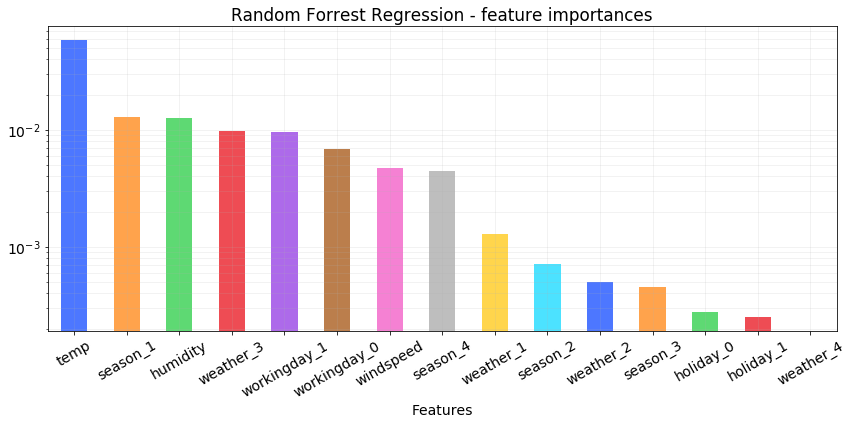

In [56]:
# Feature importances

top_feat = 15
feat_imp = pd.Series(best_model.feature_importances_, index=X_train.columns)[:top_feat]     # random forrest regr.

colors, alpha = sns.color_palette('bright'), 0.7
with plt.rc_context(rc={'font.size':14}): 
    fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
    feat_imp.sort_values(ascending=False).plot(kind='bar', color=colors, ax=ax, alpha=alpha) 
    ax.set(xlabel='Features', title='Random Forrest Regression - feature importances')    
    ax.set_yscale('log')
    ax.tick_params(axis='x', rotation=30)
    ax.grid(alpha=0.2, which='both')    

On remarque ainsi que les *features* qui ont le plus d'influence pour prédire la variable `count` sont:
- la température
- l'été (*season_1*)
- le taux d'humidité
- un temp de fortes pluie / neige
- jour de travail ou non (weekend)
- la vitesse du vent

Nous pouvons visualiser par exemple les prédictions obtenues de la variable `count` ci-dessous:

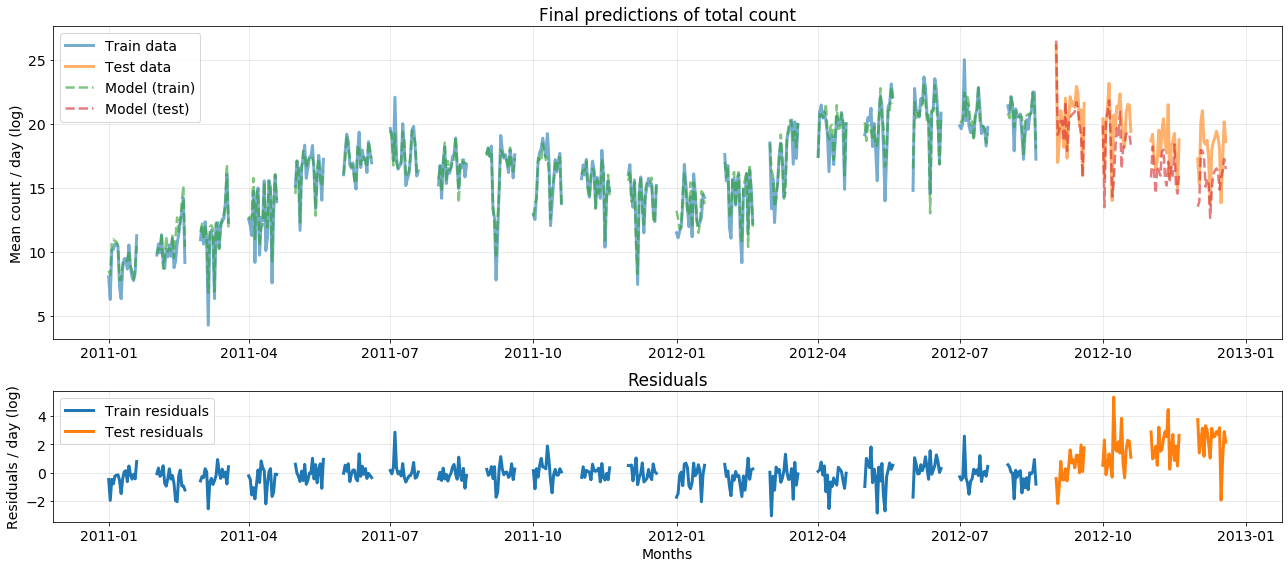

In [104]:
log = True

# Train
df_day_train = df_train.groupby(pd.Grouper(freq='d'))
df_train['predicted'] = inv_boxcox1p(best_model.predict(X_train), 0.4)   # back to normal count values
if log:
    df_train['predicted'] = best_model.predict(X_train)   

# Test
df_day_test = df_test.groupby(pd.Grouper(freq='d'))
df_test['predicted'] = inv_boxcox1p(best_model.predict(X_test), 0.4)        # back to normal count values
if log:
    df_test['predicted'] = best_model.predict(X_test)                       

# Data
col = 'count'
if log:
    col = 'count_log'
    
x, y = df_day_train[col].median().index, df_day_train[col].median().values
x1, y1 = df_day_test[col].median().index, df_day_test[col].median().values

# Model
y_model_train = df_day_train['predicted'].median().values
y_model_test = df_day_test['predicted'].median().values

with plt.rc_context(rc={'font.size':14}): 
    fig = plt.figure(figsize=(18, 8), tight_layout=True)
    ax1 = plt.subplot2grid((3, 1), (0, 0), colspan=1, rowspan=2)  
    ax2 = plt.subplot2grid((3, 1), (2, 0), colspan=1, rowspan=1)   
    
    # Data
    line, = ax1.plot(x, y, alpha=0.6, lw=3, label='Train data')
    ax1.plot(x1, y1, alpha=0.6, lw=3, label='Test data')
    
    # Model
    ax1.plot(x, y_model_train, alpha=0.6, lw=2.5, ls='--', label='Model (train)')  
    ax1.plot(x1, y_model_test, alpha=0.6, lw=2.5, ls='--', label='Model (test)')      
    #ax.fill_between(x, y1=y, y2=-y, alpha=0.1, linewidth=2, color=line.get_color())
    ylabel='Mean count / day'
    if log:
        ylabel += ' (log)'
    ax1.set(ylabel=ylabel, title='Final predictions of total count')
    
    # Residuals    
    ax2.plot(x, y-y_model_train, lw=3, label='Train residuals')
    ax2.plot(x1, y1-y_model_test, lw=3, label='Test residuals')    
    ylabel = 'Residuals / day'
    if log:
        ylabel += ' (log)'
    ax2.set(xlabel='Months', ylabel=ylabel, title='Residuals')
    for ax in [ax1,ax2]:
        ax.legend(loc='best')
        ax.grid(alpha=0.3, which='both')        

Nous allons aussi visualiser nos prédictions sur 2 jours entiers: un dimanche et un lundi afin de visualiser 2 comportements différents au sein de la variable `count`.

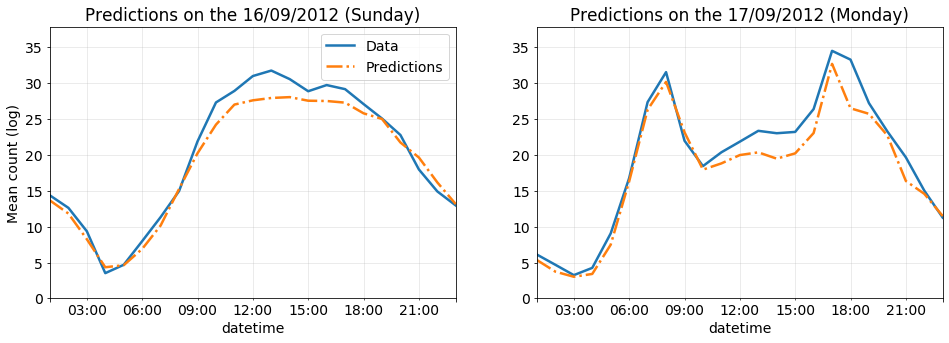

In [192]:
# Check prediction on one day the TEST dataset
N = 15   # 16th Septembre
dat = df_test.groupby(pd.Grouper(freq='h'))

with plt.rc_context(rc={'font.size':14}): 
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5), tight_layout=None)
    # Sunday
    dat['count_log'].median()[24*N-8:24*(N+1)-9].plot(ax=ax1, lw=2.5, label='Data')
    dat['predicted'].median()[24*N-8:24*(N+1)-9].plot(ax=ax1, lw=2.5, ls='-.', label='Predictions')
    ax1.set(ylabel='Mean count (log)', title='Predictions on the 16/09/2012 (Sunday)')
    # Monday
    dat['count_log'].median()[24*(N+1)-8:24*(N+2)-9].plot(ax=ax2, lw=2.5, label='Data')
    dat['predicted'].median()[24*(N+1)-8:24*(N+2)-9].plot(ax=ax2, lw=2.5, ls='-.', label='Predictions')
    ax2.set(title='Predictions on the 17/09/2012 (Monday)')
    _, ymax = ax2.get_ylim()
    for ax in [ax1,ax2]:
        ax.grid(alpha=0.3, which='both')  
        ax.set(ylim=[0,ymax*1.05])
    ax1.legend(loc='best')

# Conclusion / résumé

## ***Analyse exploratoire***

#### 1. Par quelles étapes passes-tu afin de prendre en main la donnée avant de passer à la modélisation ?

Avant de passer à la modélisation, il est important de vérifier la qualité des données i.e. s'il y a des données manquantes, ou des `NaN`. Si tel est le cas il faut soit les enlever, soit les remplacer par la valeur moyenne, médiane ou encore modale (pour des données catégoriques). Dans notre étude, les données ne comportaient ni données manquantes ni `NaN`.

Ensuite, il faut repérer les différentes types de données présentes: numériques, catégoriques. À l'aide des librairies `matplotlib` et `seaborn`, il est alors possible de visualiser ces différentes variables. Cela permet de visualiser la présence de potentielles valeurs abérrantes. Enfin, il est important d'étudier la distribution de la varibale que l'on cherche à prédire. Si cette dernière est fortement asymétrique il est judicieux d'effectuer une transformation à l'aide de la fonction *log* afin de 'normaliser' celle-ci. Nous avons effectué ceci sur la variable `count` grâce à la fonction `boxcox` qui permet de mieux corriger l'asymétrie que la fonction *log*.

Par la suite, il est important d'étudier les potentielles corrélations entre la variable que l'on cherche à prédire et les autres. Cela donne des informations sur les potentielles variables qu'il est nécessaire de retirer des données lors de la modélisation (cas de multicolinéarité).

Puis, il faut étudier les comportements plus fins qui existent entre les variables et celle que l'on cherche à prédire, grâce à des fonctions d'aggrégations, des tables pivot etc.

#### 2. Avant de passer à la modélisation, quels sont les facteurs qui semblent influencer la demande en vélos ?

Pour cette étude, nous avons pu voir que ce sont l'**heure**, la **température**, le taux d'**humidité**, l'**année**, les **saisons** et la **météo** qui influencent le plus la demande en vélo.

## ***Modélisation***

#### 3-4. Construis un premier modèle permettant de prédire la variable count et explique ton choix et ta démarche. Evalue la performance de ton modèle et explique le critère de performance choisi.

Les études statistiques précédentes nous ont permis de faire du *feature engineering* afin de construire des variables suceptibles d'avoir du poids quand à la prédiction du nombre de locations.

Nous avons choisi d'utiliser le *root mean square error* (RMSE) comme métrique principale (critère de performance) afin de quantifier la différence entre les données et les prédictions. Dans une moindre mesure, nous avons également calculé le score $R^2$ pour estimer la corrélation entre les données et les prédictions.

Tout d'abord, nous avons effectué une regression très basique (en utilisant la médiane comme *regressor*) afin de calculer un RMSE de référence.

Par la suite, nous avons choisi de tester différents modèles *classiques* et le RMSE a été estimé pour chacun d'entre eux ainsi que le coefficient $R^2$. Cette étude nous a ainsi poussé à choisir le modèle de forrêt aléatoire (`RandomForrestRegressor`). Nous avons alors estimé (rapidement) les hyperparamètres optimaux de ce modèle ce qui nous a conduit à obtenir notre *meilleur* modèle avec RMSE=2.56 et $R^2$=0.91.

#### 5. Quelles pistes d’améliorations imagines-tu ?

De nombreuses améliorations peuvent être envisagées: 

- utiliser des méthodes dédiées aux données temporelles: ***Multiplicative decomposition***, ***Exponential Smoothing***, ***SARIMA*** etc.
- obtenir les données des années d'après (2012-2020) pour tester des modèles de tendance et saisonnalité ou même pour mieux contraindre les modèles d'apprentissage que nous avons utilisés.
- prédire les locations des abonnés et non abonnés séparément et sommer ces prédictions pour obtenir le total `count`.
- effectuer des *feature engineering* plus fines
- entrainer le modèle du 1er au 14ème du mois et tester ce dernier du 15ème au 19ème du mois
- trouver un moyen d'estimer précisément les locations des 10 derniers jours via la moyenne/médiane des 20 jours d'avant

Par exemple, un modèle tenant compte de la saisonnalité et de la tendance est présenté ci-dessous:

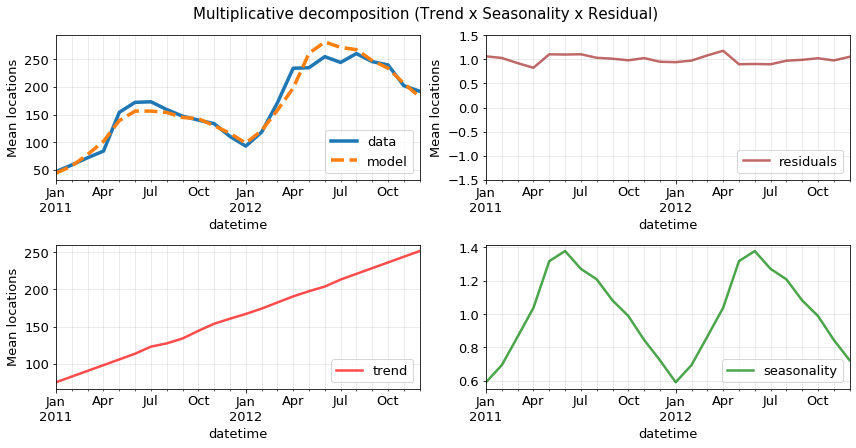

In [193]:
from statsmodels.tsa.seasonal import seasonal_decompose

data = df.groupby(pd.Grouper(freq='M'))
data = data['count'].median()

# Multiplicative Decomposition : Trend x Seasonality x Residual 
result_mul = seasonal_decompose(data, model='multiplicative', 
                                extrapolate_trend='freq')

# Additive Decomposition
#result_add = seasonal_decompose(data, model='additive', extrapolate_trend='freq')

# Plot
obs, res = result_mul.observed, result_mul.resid
trend, seas = result_mul.trend, result_mul.seasonal 
with plt.rc_context(rc={'font.size':13}):
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,6), tight_layout=True)
    # data + model
    obs.plot(ax=ax1, label='data', lw=3.5)
    (trend * seas).plot(ax=ax1, label='model', lw=3.5, ls='--')
    # residuals
    res.plot(ax=ax2, label='residuals', c='brown', alpha=0.7, lw=2.5)
    ax2.set(ylim=[-1.5,1.5])
    # trend + season
    trend.plot(ax=ax3, label='trend', c='red', alpha=0.7, lw=2.5)
    seas.plot(ax=ax4, label='seasonality', c='green', alpha=0.7, lw=2.5)
    for ax in [ax1,ax2,ax3,ax4]:
        ax.legend(loc='lower right')
        ax.grid(alpha=0.3, which='both')
    for ax in [ax1,ax2,ax3]:
        ax.set(ylabel='Mean locations')
    fig.suptitle('Multiplicative decomposition (Trend x Seasonality x Residual) ', y=1.03, fontsize=15)

On remarque déjà que ce modèle semble assez adapté puisque qu'il tient compte de la tendance *et* de la saisonnalité.

<a id="content3"></a>
# <font color='blue'>III) Pour aller plus loin</font>

#### 6. Au dela de sa performance, l’explicabilité d’un modèle de machine learning **black-box** devient de plus en plus important afin d’en rendre l’utilisation plus facile par des équipes opérationnelles. Sans les implémenter, peux-tu nous expliquer simplement 1 ou 2 méthodes qui existent aujourd’hui afin d’expliquer un modèle de machine learning et donner un sens métier à ces prédictions ?

Si l'on prend le cas de la location des vélos, le modèle que nous avons utilisé (`RandomForrestRegressor`) nous permet d'avoir des informations sur l'importance des différentes variables quand à la prédiction de ces locations horaires. À partir de ce modèle, nous pouvons ainsi en déduire que c'est la **température**, la saison d'**été**, le taux d'**humidité**, la présence de **pluies/neiges**, si le jour est en **semaine** qui influent le plus sur le nombre total de locations horaires de vélos. De plus, nos études statistiques ont montré que le nombre de locations a augmenté de 66% entre 2011 et 2012 (70% chez les abonnés et 52% chez les non-abonnés).

Un sens métier associé peut ainsi être: 
- créer une formule/forfait spécifique durant la période d'été large (Mai-Septembre) valable du lundi au vendredi (avec option d'étendre au dimanche) et aussi une formule valable uniquement tout les week-end et les jours fériés/vacances durant cette période. Cela permettrait de tenir compte de la température, de l'humidité mais aussi du fait que chez les non abonnés il y a beaucoup plus de locations effectuées durant le week-end et les vacances. Nous pourrions alors mieux cibler les 2 populations. De plus, il faudrait que les tarifs de locations/formules suivent la tendance du nombre total de locations (qui a augmenté de 66%).

#### Explication du modèle choisi (`RandomForrestRegressor`) 

Ce modèle se base sur un ensemble de briques élémentaires que sont les arbres de décision. Un arbe de décision débute par choisir une des variables servant aux prédictions de manière aléatoire. Cet arbre va alors 'grandir' en répondant à des questions selon des critères portant sur les données jusqu'à arriver à une prédiction parmi celles possibles. Nous présentons ici un exemple d'arbre de décision pour prédire la température. 

L'idée derrière les forêts aléatoires va alors être de générer un grand nombre d'arbres de décision, de les entraîner individuellement sur les données pour prédire une valeur finale. Dans le cas d'une régression, on moyenne les votes de chaque arbre et dans le cas d'une classification il s'agit de la majorité des votes (qui est la classe prédite). L'avantage est qu'il y a peu de risque d'*overfitting* car la corrélation entre les différents arbres est faible.

<img src='https://miro.medium.com/max/1280/1*H3nZElqhfOE35AFAq8gy0A.png' width='600' align='center'>